In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('https://storage.googleapis.com/dimensionless/Analytics/USArrests.csv',index_col=0)

In [3]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [5]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [6]:
scale(df)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [7]:
X=pd.DataFrame(scale(df),index=df.index,columns=df.columns)
X.head(10)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814
Colorado,0.025976,0.402909,0.869548,1.883901
Connecticut,-1.040880,-0.736484,0.799761,-1.092723
Delaware,-0.437875,0.815030,0.450825,-0.585834
Florida,1.765415,1.990786,1.009122,1.150530
Georgia,2.229265,0.487757,-0.386621,0.492653


In [8]:
X.mean(),X.var(),X.std()

(Murder     -8.437695e-17
 Assault     1.298961e-16
 UrbanPop   -4.263256e-16
 Rape        8.326673e-16
 dtype: float64, Murder      1.020408
 Assault     1.020408
 UrbanPop    1.020408
 Rape        1.020408
 dtype: float64, Murder      1.010153
 Assault     1.010153
 UrbanPop    1.010153
 Rape        1.010153
 dtype: float64)

In [9]:
pca = PCA()

In [10]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [12]:
pca_loadings = pd.DataFrame(pca.components_,index=['PC1','PC2','PC3','PC4'],columns=['Murder','Assault','UrbanPop','Rape'])

In [13]:
pca_loadings.T

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [14]:
PCscore = pd.DataFrame(pca.transform(X),index=df.index,columns=['PC1','PC2','PC3','PC4'])
PCscore

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285
Georgia,1.639283,1.278942,-0.342460,1.076797


In [15]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [16]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [17]:
pca.mean_

array([-7.10542736e-17,  1.38777878e-16, -4.39648318e-16,  8.59312621e-16])

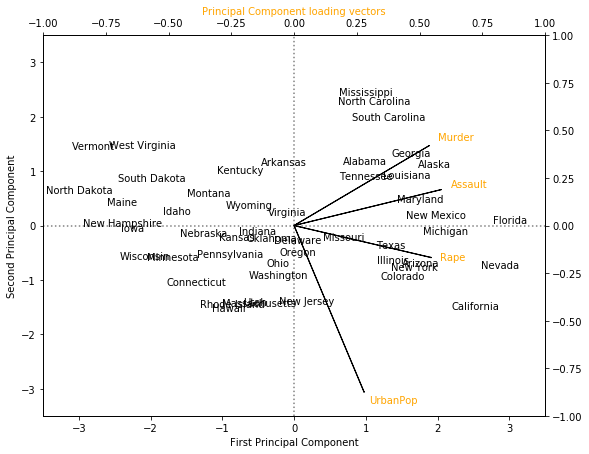

In [18]:
fig,ax1 =plt.subplots(figsize=(9,7))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)
# Plot Principal Components 1 and 2
for i in PCscore.index:
    ax1.annotate(i, (PCscore.PC1.loc[i], PCscore.PC2.loc[i]), ha='center')
# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y',colors='r')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings.T[['PC1', 'PC2']].index:
    ax2.annotate(i, (pca_loadings.T.PC1.loc[i]*a, pca_loadings.T.PC2.loc[i]*a), color='orange')
    
#Plot vectors
ax2.arrow(0,0,pca_loadings.T.PC1[0], pca_loadings.T.PC2[0])
ax2.arrow(0,0,pca_loadings.T.PC1[1], pca_loadings.T.PC2[1])
ax2.arrow(0,0,pca_loadings.T.PC1[2], pca_loadings.T.PC2[2])
ax2.arrow(0,0,pca_loadings.T.PC1[3], pca_loadings.T.PC2[3])



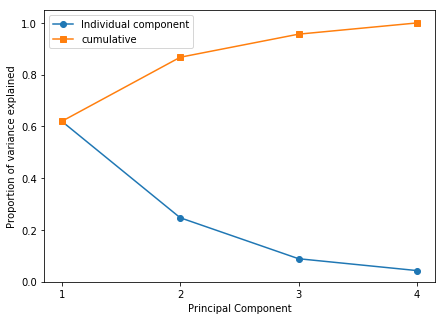

In [19]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4],pca.explained_variance_ratio_,'-o',label='Individual component')
plt.plot([1,2,3,4],np.cumsum(pca.explained_variance_ratio_),'-s',label='cumulative')
plt.ylabel('Proportion of variance explained')
plt.xlabel('Principal Component')
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2)

In [ ]:
import numpy as np
import pandas as pd

In [20]:
Hitters = pd.read_csv("https://storage.googleapis.com/dimensionless/Analytics/Hitters.csv", index_col=0)

In [21]:
Hitters.shape

(322, 20)

In [38]:
Hitters = Hitters.dropna()

In [22]:
Hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [39]:
Hitters.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,5.927222
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,0.889192
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,4.212128
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,5.247024
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,6.052089
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,6.620073
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,7.807917


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7e5eed780>]],
      dtype=object)

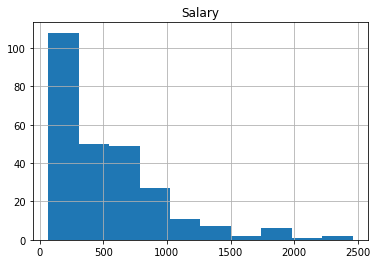

In [24]:
Hitters.hist('Salary')

In [25]:
Hitters.Salary=np.log(Hitters.Salary)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7e57792b0>]],
      dtype=object)

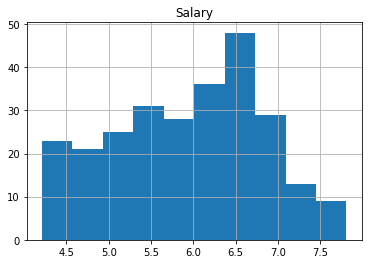

In [26]:
Hitters.hist('Salary')

In [40]:
X = Hitters.copy()

In [41]:
del X['Salary']

In [42]:
X = pd.get_dummies(X,columns=['League','Division','NewLeague'],drop_first=True)

In [43]:
y=Hitters.Salary

In [44]:
X.shape

(263, 19)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [48]:
scalar = StandardScaler()

In [51]:
scalar.fit(X_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [52]:
scalar.transform(X_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 1.00043399,  0.67991177, -1.10503803, ..., -1.        ,
         0.98113038, -0.95346259],
       [-0.72361889, -0.73534822, -0.64845567, ...,  1.        ,
        -1.01923253,  1.04880885],
       [ 1.25765155,  1.15927402,  0.37885465, ...,  1.        ,
        -1.01923253,  1.04880885],
       ...,
       [ 0.75016825,  0.70273854,  1.52031056, ..., -1.        ,
         0.98113038, -0.95346259],
       [-0.41773854, -0.09619855, -0.64845567, ..., -1.        ,
        -1.01923253, -0.95346259],
       [ 0.29134772, -0.18750564, -1.21918362, ..., -1.        ,
         0.98113038, -0.95346259]])

In [53]:
Scale_X = pd.DataFrame(scalar.transform(X_train),columns=X_train.columns)
Scale_X.head()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,1.000434,0.679912,-1.105038,0.147801,-0.189856,-1.405276,-1.110994,-0.698876,-0.686170,-0.794495,-0.692556,-0.769664,-0.888912,-0.141681,2.453172,2.135975,-1.0,0.981130,-0.953463
1,-0.723619,-0.735348,-0.648456,-0.658387,-1.136317,-0.740404,-0.899472,-0.896033,-0.853703,-0.736728,-0.862898,-0.911585,-0.813165,-0.303922,-0.800359,-1.016202,1.0,-1.019233,1.048809
2,1.257652,1.159274,0.378855,0.631514,1.269272,0.019449,-0.476428,-0.130651,-0.135270,-0.159053,-0.293133,-0.057041,-0.472302,0.090092,-0.665387,-0.700984,1.0,-1.019233,1.048809
3,-0.153569,0.063589,-0.306019,0.268730,-0.268727,-0.455460,-0.053384,0.152170,0.163574,-0.367016,0.253135,-0.259354,-0.343532,-0.250945,-0.757736,-0.543375,1.0,-1.019233,1.048809
4,-1.029499,-0.849482,-0.534310,-0.214984,-0.663086,0.066939,1.638792,1.571012,1.411775,0.950082,1.921311,0.824678,2.125828,-0.836999,-0.423859,-0.070549,1.0,-1.019233,1.048809


In [54]:
Scale_X.mean(),Scale_X.std()

(AtBat          3.409971e-17
 Hits           1.312442e-16
 HmRun          7.718693e-17
 Runs          -9.965573e-17
 RBI           -9.198991e-17
 Walks          1.083789e-16
 Years         -1.163091e-17
 CAtBat         3.172066e-17
 CHits         -3.119198e-17
 CHmRun         2.960595e-17
 CRuns          3.912214e-17
 CRBI           5.286776e-18
 CWalks         9.516197e-17
 PutOuts        8.115202e-17
 Assists       -4.017950e-17
 Errors        -2.643388e-17
 League_N       0.000000e+00
 Division_W     3.256654e-16
 NewLeague_N    2.114711e-18
 dtype: float64, AtBat          1.002389
 Hits           1.002389
 HmRun          1.002389
 Runs           1.002389
 RBI            1.002389
 Walks          1.002389
 Years          1.002389
 CAtBat         1.002389
 CHits          1.002389
 CHmRun         1.002389
 CRuns          1.002389
 CRBI           1.002389
 CWalks         1.002389
 PutOuts        1.002389
 Assists        1.002389
 Errors         1.002389
 League_N       1.002389
 Divisio

In [55]:
pca_hitters = PCA()

In [56]:
pca_hitters.fit(Scale_X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [57]:
pca_hitters.fit(Scale_X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca_loadings = pd.DataFrame(pca_hitters.components_,index=['PC1','PC2','PC3','PC4'],columns=['Murder','Assault','UrbanPop','Rape'])

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
pca_lm = LinearRegression()

In [ ]:
pca_lm.fit()